# Toy example 1

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

import metachat as mc

In [2]:
# setting work dictionary
os.chdir("/home/Project/MetaChat_test/toy_example")

## Data preprocessing

### Multi-omics data from simulation

In [3]:
adata = sc.read("data/example1/adata_example1.h5ad")
adata

AnnData object with n_obs × n_vars = 2500 × 2
    obsm: 'spatial'

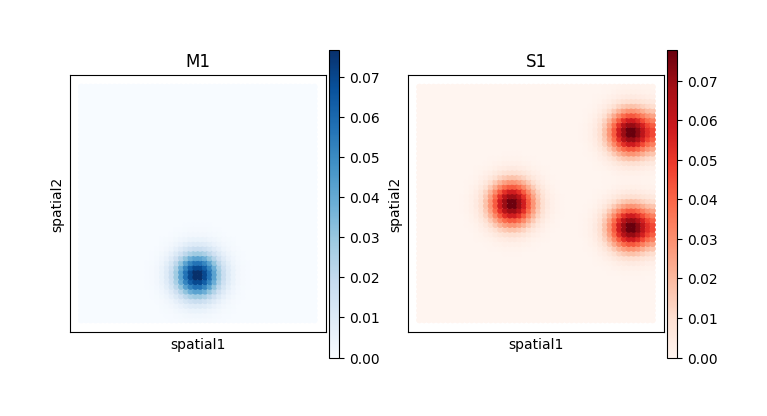

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
sq.pl.spatial_scatter(adata = adata,
                      color = "M1",
                      size = 80,
                      cmap = "Blues",
                      shape = None,
                      ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_box_aspect(1)

sq.pl.spatial_scatter(adata = adata,
                      color = "S1",
                      size = 80,
                      cmap = "Reds",
                      shape = None,
                      ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_box_aspect(1)
plt.show()

### Metabolite-sensor database construction

In [5]:
M_S_pair = [['M1', 'S1', 'type1']]
df_MetaSen = pd.DataFrame(M_S_pair)
df_MetaSen.columns = ['Metabolite', 'Sensor', 'Long.Range.Channel']

### Long-range channels

In [6]:
LRC_channel = np.load('data/example1/LRC_channel.npy')
adata.obs['LRC_type1_filtered'] = LRC_channel.flatten()
adata.obs['LRC_type1_filtered'] = adata.obs['LRC_type1_filtered'].astype('category')

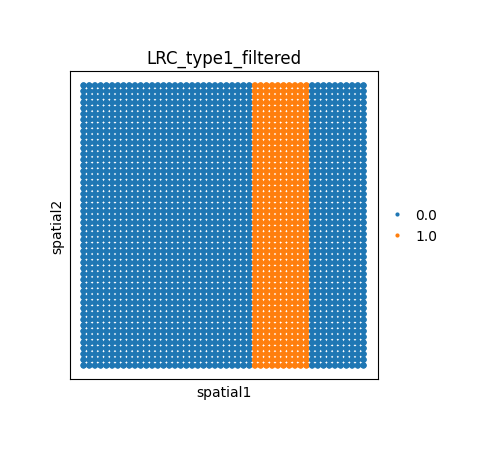

In [7]:
fig, ax = plt.subplots(figsize = (4,4))
sq.pl.spatial_scatter(adata = adata,
                      color = "LRC_type1_filtered",
                      size = 80,
                      shape = None,
                      ax = ax)
ax.invert_yaxis()
ax.set_box_aspect(1)

plt.show()

In [8]:
mc.pp.compute_longRangeDistance(adata = adata,
                                database_name = "msdb_example1",
                                df_MetaSen = df_MetaSen,
                                LRC_name = ["type1"],
                                dis_thr = 10,
                                k_neighb = 5,
                                LRC_strength = 4,
                                plot = True,
                                spot_size = 1)

AttributeError: module 'metachat.preprocessing' has no attribute 'compute_longRangeDistance'

In [15]:
# In the case of with LR Channel
mc.tl.metabolic_communication(adata = adata,
                              database_name = 'msdb_example1',
                              df_MetaSen = df_MetaSen,
                              LRC_type = ["type1"],
                              dis_thr = 15,
                              cot_weights = (1.0,0.0,0.0,0.0),
                              cot_eps_p = 0.25,
                              cot_rho = 1.0,
                              cost_type = 'euc')
adata.write('data/example1/inference_result.h5ad')

There are 1 pairs were found from the spatial data.


In [16]:
MCC_PDE = np.load('data/example1/pde_result.npy')
MCC_infer = adata.obsm['MetaChat-msdb_example1-sum-receiver']['r-M1-S1'].values.reshape(50,50)

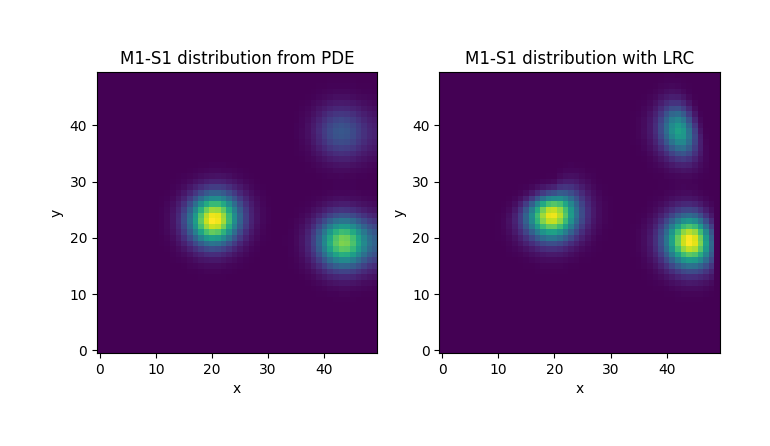

In [19]:
fig, ax = plt.subplots(1,2, figsize = (7,14))
ax[0].imshow(MCC_PDE[2].T, cmap='viridis', origin='lower')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('M1-S1 distribution from PDE')
ax[0].set_box_aspect(1)
ax[1].imshow(MCC_infer.T, cmap='viridis', origin='lower')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('M1-S1 distribution with LRC')
ax[1].set_box_aspect(1)
plt.tight_layout()